# 1.0. Imports

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import scipy.stats as st

# 2.0. Dados

In [23]:
# dados da Xioami
X_a = np.array([1]* (int(0.83*201) + int(0.09*201)) + [0]* (int(0.01*201) + int(0.03*201)))
np.random.shuffle( X_a )

# dados da motorola
X_b = np.array([1]* (int(0.78*301) + int(0.15*301)) + [0]* (int(0.02*301) + int(0.03*301)))
np.random.shuffle( X_b )

In [24]:
X_a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
X_b

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1])

# 3.0. Bayesiana

In [26]:
#pymc3 needs caluclation in session 
with pm.Model() as model:
    #Prior
    p_a = pm.Beta('p_a', 1, 1 )
    p_b = pm.Beta('p_b', 5, 2 )

    #determinist
    pm.Deterministic( 'delta', p_a - p_b )


    #Posterior
    obs_a = pm.Bernoulli('obs_a', p_a, observed=X_a)
    obs_b = pm.Bernoulli('obs_b', p_b, observed=X_b)
    #Likelihood
    trace = pm.sample( draws=2000, tune=1000, step=pm.Metropolis() )

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:08<00:00, 1348.88draws/s]
The number of effective samples is smaller than 25% for some parameters.


# 4.0. Plot Posterior

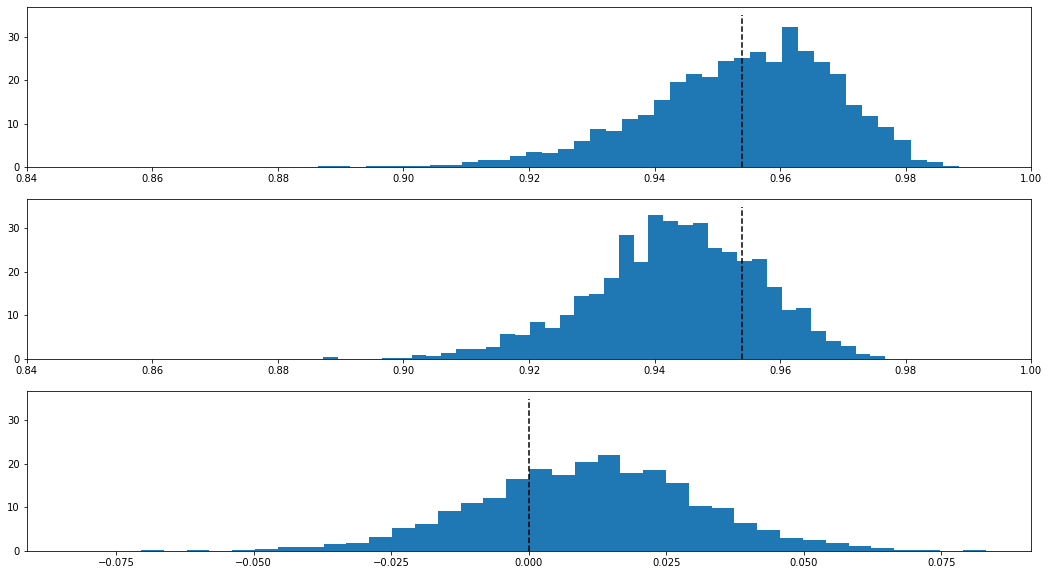

In [27]:
plt.figure( figsize=(18,10))

plt.subplot ( 311 )
plt.hist( trace['p_a'], histtype='stepfilled', bins=40, density=True );
plt.xlim( [0.84, 1.0])
plt.vlines( trace['p_a'].mean(), 0, 35, linestyle='--')

plt.subplot ( 312 )
plt.hist( trace['p_b'], histtype='stepfilled', bins=40, density=True );
plt.xlim( [0.84, 1.0])
plt.vlines( trace['p_a'].mean(), 0, 35, linestyle='--')

plt.subplot ( 313 )
plt.hist( trace['delta'], histtype='stepfilled', bins=40, density=True );
plt.vlines(0, 0, 35, linestyle='--')

In [28]:
print('Xiaomi: {}'.format(np.mean( trace['delta'] > 0) ) )
print('Motorola: {}'.format(np.mean( trace['delta'] < 0) ) )

Xiaomi: 0.711875
Motorola: 0.288125
